## Über den Datensatz

Die Daten, mit denen wir arbeiten stammen von OSMI (Open Sourcing Mental Illness), einer Non-Profit Organisation, die sich der Sensibilisierung für psychische Erkrankungen in der Tech-Szene widmet. 
Seit 2014 führt OSMI jedes Jahr ein "Mental Health in Tech" Survey durch und stellt die Daten freundlicherweise auf ihrer Seite zur freien Verfügung: https://osmihelp.org/research

Wir nehmen für die Sitzung den Datensatz von 2016, da das mit 1432 Teilnehmenden der größte Datensatz ist. An diesem Datensatz wollen wir untersuchen, ob sich die **Inanspruchnahme von psychologischer/ psychotherapeutischer Behandlung** durch den Umgang mit psychischen Erkrankungen am Arbeitsplatz und im persönlichen Umfeld vorhersagen lässt. 

**Unser Plan für die heutige Sitzung:**

1. Packages Importieren und Einstellungen für unser Jupyter Notebook festlegen
2. Daten einlesen
3. Exploratory Data Analysis: Daten explorieren und visualisieren
4. Data Cleaning: Daten für die Analyse vorverarbeiten

## Schritt 1: Importiere relevante Packages

Das **pandas** Paket ist das wichtigste Python-Package für den Import, die Vorverarbeitung und Exploration von Datensätzen. 

Mit "as" legen wir fest, dass wir im Code z.B. nur pd statt pandas schreiben müssen um eine Funktion aus diesem Package zu benutzen - das ist nicht unbedingt notwendig, aber sehr praktisch. 

Wir können auch nur bestimmte Funktionen von Packages importieren, indem wir diese mit "from" spezifizieren (hier wird z.B. nur die "Path" Funktion aus dem "pathlib" Package importiert. 

In [1]:
import pandas as pd 
import numpy as np
import helpers

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Display plots inside the notebook
%matplotlib inline

# Ignore warning related to pandas_profiling
import warnings
warnings.filterwarnings('ignore') 

from pathlib import Path

# Display all dataframe columns in outputs (it has 63 columns, which is wider than the notebook)
# This sets it up to display with a horizontal scroll instead of hiding the middle columns
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_colwidth', -1)

## Schritt 2: Lese den Datensatz ein

Zunächst müssen wir den Datensatz einlesen. Dafür benutzen wir die read_csv Funktion. Hier ist es wichtig, dass ihr den richtigen Pfad zum Datensatz nennt. 
Leider unterscheidet sich Windows hier von den meisten anderen Betriebssystemen (ein kleiner Exkurs dazu: https://docs.microsoft.com/de-de/archive/blogs/larryosterman/why-is-the-dos-path-character). 

Damit es hier keine Fehler gibt benutzen wir die Path Funktion aus dem pathlib Package - dieses erkennt das Betriebssystem und wandelt den Pfad entsprechend um. 

In [2]:
data_folder = Path("data_tech/") 

file_to_open = data_folder / "OSMI_2016_kurz.csv" # in file_to_open ist jetzt der Pfad zu unserer .csv Datei gespeichert

In [3]:
df_2016 = pd.read_csv(file_to_open) # hier lesen wir den Datensatz ein und speichern ihn in der Variable df_2016

In [4]:
df_2016.columns = map(str.lower, df_2016.columns)

## Schritt 3: Exploratory Data Analysis (EDA) = Daten explorieren, visualisieren und verstehen

### 3.1 Allgemeine Informationen über den Datensatz sammeln

In [5]:
df_2016.shape # wie viele Zeilen und Spalten hat unser Datensatz? (Zeilen, Spalten)

(1433, 27)

In [6]:
df_2016.head(3) # Zeige mir die ersten 3 Zeilen des Datensatzes. 

,are you self-employed?,does your employer provide mental health benefits as part of healthcare coverage?,"has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",do you think that discussing a mental health disorder with your employer would have negative consequences?,do you think that discussing a physical health issue with your employer would have negative consequences?,would you feel comfortable discussing a mental health disorder with your coworkers?,would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,do you feel that your employer takes mental health as seriously as physical health?,have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,"if you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?",do you believe your productivity is ever affected by a mental health issue?,would you be willing to bring up a physical health issue with a potential employer in an interview?,why or why not?,would you bring up a mental health issue with a potential employer in an interview?,why or why not?.1,do you feel that being identified as a person with a mental health issue would hurt your career?,do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,how willing would you be to share with friends and family that you have a mental illness?,have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?,have you had a mental health disorder in the past?,have you ever sought treatment for a mental health issue from a mental health professional?,"if you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","if you have a mental health issue, do you feel that it interferes with your work when not being treated effectively?",what is your age?,what is your gender?,what country do you live in?
0,0,Not eligible for coverage / N/A,No,No,No,Maybe,Yes,I don't know,No,NaN,NaN,Maybe,NaN,Maybe,NaN,Maybe,"No, I don't think they would",Somewhat open,No,NaN,Yes,0,Not applicable to me,Not applicable to me,39,Male,United Kingdom
1,0,No,Yes,No,No,Maybe,Yes,Yes,No,NaN,NaN,Maybe,"It would depend on the health issue. If there is a health issue that would not immediately affect my job performance, such as diabetes, I would not bring it up during the interview. If it was something more severe, such as narcolepsy, I might bring it up depending on how controlled it was.",No,"While mental health has become a more prominent issue recently, I feel like there is still a lot of stigma surrounding it. At this point, with our culture, I would not bring it up. I hope that within the next 20-30 years that stigma will be gone and it can be brought up safely in an interview.","No, I don't think it would","No, I don't think they would",Somewhat open,No,NaN,Yes,1,Rarely,Sometimes,29,male,United States of America
2,0,No,No,Maybe,No,Maybe,Maybe,I don't know,No,NaN,NaN,Yes,"They would provable need to know, to Judge if I can do my job or not.",Yes,"Stigma, mainly.",Maybe,Maybe,Somewhat open,Maybe/Not sure,Yes,Maybe,1,Not applicable to me,Not applicable to me,38,Male,United Kingdom


**1.Aufgabe**:

Probiere die folgenden Pandas-Funktionen aus. Entferne das # am Anfang der Zelle um sie zu aktivieren

In [7]:
#df_2016.tail(3) # Zeige mir die letzten 3 Zeilen des Datensatzes

In [8]:
#df_2016.info() # Informationen über Daten-Typen

In [9]:
#df_2016.describe() # Statistics für numerische Variablen

In [10]:
#df_2016.isnull() # gibt es fehlender Werte?

In [11]:
#df_2016.isnull().sum()

### 3.2 Antwortformate und Missing Values überprüfen

#### Welche Antwortformate haben wir?

In [12]:
answer_table = helpers.show_answers(df_2016)
answer_table

,Amount of Answers,Anwers
Item,,
why or why not?,1085,Free Input
why or why not?.1,1080,Free Input
what is your gender?,70,Free Input
what country do you live in?,53,Free Input
what is your age?,53,Free Input
how willing would you be to share with friends and family that you have a mental illness?,6,"[Somewhat open, Neutral, Not applicable to me (I do not have a mental illness), Very open, Not open at all, Somewhat not open]"
do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,5,"[No, I don't think they would, Maybe, Yes, they do, Yes, I think they would, No, they do not]"
"if you have a mental health issue, do you feel that it interferes with your work when not being treated effectively?",5,"[Not applicable to me, Sometimes, Often, Rarely, Never]"
"if you have a mental health issue, do you feel that it interferes with your work when being treated effectively?",5,"[Not applicable to me, Rarely, Sometimes, Never, Often]"


Bei einigen Antwortformaten sehen wir "nan", d.h. fehlende Werte. Das sollten wir uns im nächsten Schritt genauer ansehen.

Außerdem sehen wir, dass viele Items 2 (binäres Ja/Nein Antwortformat) bis 6 Antwortoptionen haben. Zwei Items stechen jedoch heraus, z.B. 'Why or why not?', 1085. Das sind die Items mit freien Antwortoptionen. Hier könnten wir **Natural Language Processing (NLP)** anwenden - das würde jedoch den Rahmen dieser Sitzung sprengen. Daher werden wir diese erstmal nicht weiter beachten. 

Wir werden aber Gender und Country in händelbare Kategorien umwandeln.

#### Welche Variablen haben Missing Values?

In [13]:
missing_df = helpers.missing_values_table(df_2016)
missing_df

The dataset has 27 columns.
There are 15 columns that have missing values.


,Missing Values,% of Total Values
"if you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?",1146,80.0
do you believe your productivity is ever affected by a mental health issue?,1146,80.0
have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?,776,54.2
why or why not?,338,23.6
why or why not?.1,307,21.4
does your employer provide mental health benefits as part of healthcare coverage?,287,20.0
"has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",287,20.0
do you think that discussing a mental health disorder with your employer would have negative consequences?,287,20.0
do you think that discussing a physical health issue with your employer would have negative consequences?,287,20.0
would you feel comfortable discussing a mental health disorder with your coworkers?,287,20.0


Von 27 Spalten haben 15 Missing Values - eine ganze Menge. Die Anzahl an fehlenden Werten variiert von 0.2 bis 80%. Eine grobe Daumenregel besagt, dass wir Spalten mit mehr als 50% fehlenden Werten komplett ausschließen sollten. 

Ein weiteres **"To Do"** für Schritt 4 ist also die Bereinigung von fehlenden Werten. 

### 3.3 Daten visualisieren

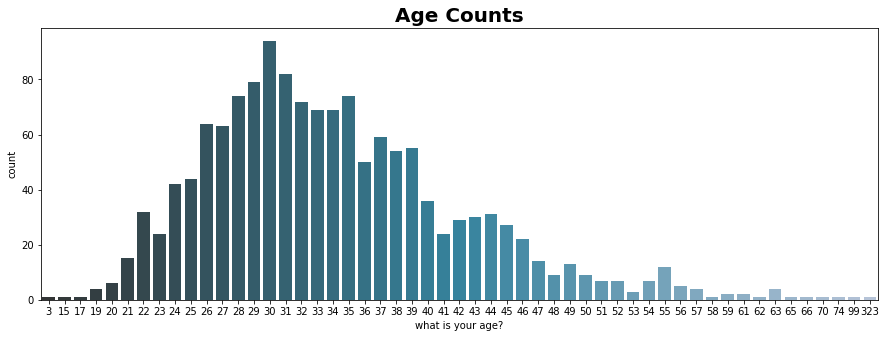

In [14]:
plt.figure(figsize=(15,5)) # Größe der Graphik festlegen
sns.countplot('what is your age?',data = df_2016, palette="PuBuGn_d") # Welche Daten?
plt.title("Age Counts",fontsize=20,fontweight="bold") 
plt.show()

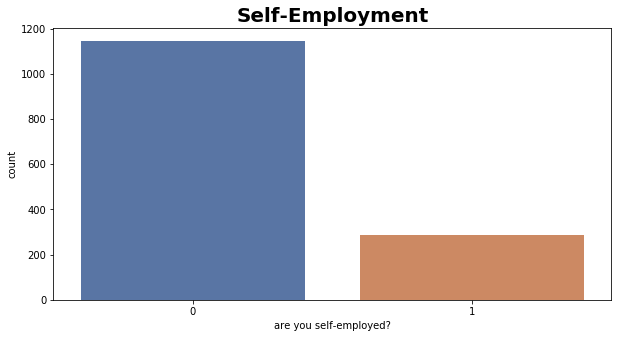

In [15]:
plt.figure(figsize=(10,5)) # Größe der Graphik festlegen
sns.countplot('are you self-employed?',data = df_2016, palette="deep") # Welche Daten? Welche Farbpalette?
plt.title("Self-Employment",fontsize=20,fontweight="bold") 
plt.show()

In [16]:
physical = df_2016["do you think that discussing a physical health issue with your employer would have negative consequences?"]
mental = df_2016["do you think that discussing a mental health disorder with your employer would have negative consequences?"]

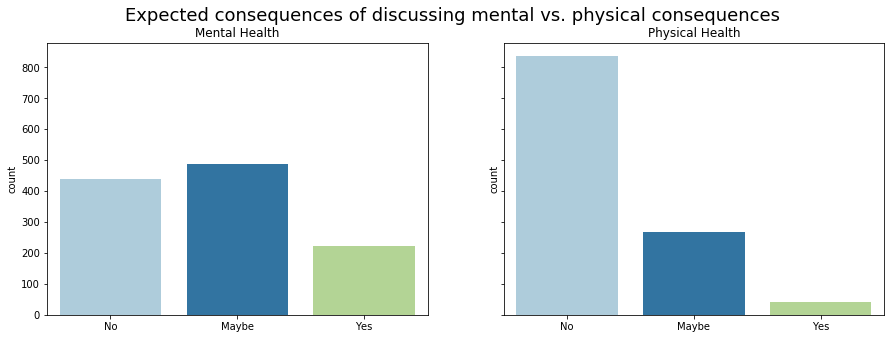

In [17]:
fig, ax =plt.subplots(1,2, sharey= True, figsize=(15,5))

fig.suptitle('Expected consequences of discussing mental vs. physical consequences', fontsize=18)

sns.countplot(df_2016['do you think that discussing a mental health disorder with your employer would have negative consequences?'], ax=ax[0], palette= "Paired")
sns.countplot(df_2016['do you think that discussing a physical health issue with your employer would have negative consequences?'], ax=ax[1], palette = "Paired")

ax[0].set_title("Mental Health")
ax[1].set_title("Physical Health")

ax[0].set_xlabel("")
ax[1].set_xlabel("")

fig.show()

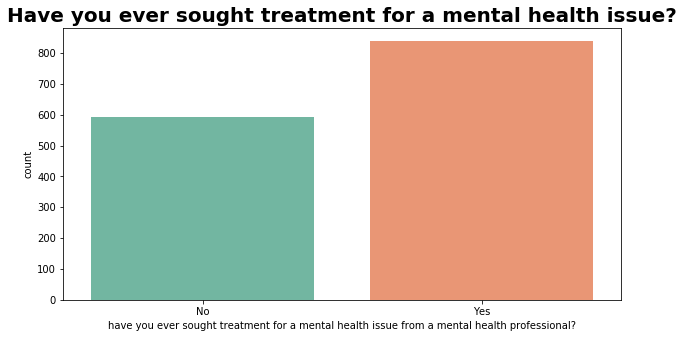

In [67]:
plt.figure(figsize=(10,5)) # Graphik-Objekt anlegen & Größe der Graphik festlegen
sns.countplot('have you ever sought treatment for a mental health issue from a mental health professional?',data = df_2016, palette="Set2") # Welche Daten? Welche Farbpalette?
plt.title("Have you ever sought treatment for a mental health issue?",fontsize=20,fontweight="bold") 
plt.xticks(ticks= np.arange(2), labels= ["No", "Yes"])
plt.show()

**2. Aufgabe**
Erstelle einen Countplot für eine Variable deiner Wahl. Versuche Dabei die Größe der Graphik und die Farben zu variieren. Mache einen Screenshot von deiner Graphik und poste ihn in den Slack Channel
- Idee für Variable: "do you feel that being identified as a person with a mental health issue would hurt your career?", "how willing would you be to share with friends and family that you have a mental illness?"
- Vorschläge für Farbpaletten: "Paired", "pastel", "Set1" (https://seaborn.pydata.org/tutorial/color_palettes.html)
- Weitere Ressourcen: https://www.youtube.com/watch?v=UO98lJQ3QGI

### To-Do's für Schritt 4:
- Features umbenennen
- Gender, Age und Country transformieren
- Missing Values löschen oder ersetzen
- Variablen für die Algorithmen auswählen und umkodieren 

## Schritt 4: Daten für die Analyse aufbereiten

### 4.1 Features umbenennen
Die Features werden umbenannt, damit wir einfacher damit arbeiten können. Dafür benutze ich ein Dictionary. Die .rename Funktion kann dann dieses Dictionary Nutzen um zu schauen, welche Variable wie umbenannt werden soll.

In [19]:
rename_dict = {'are you self-employed?': "Employment", 
              'does your employer provide mental health benefits as part of healthcare coverage?':"Ment_Benefit",
              'has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?': "Ment_Discuss",
               'do you think that discussing a mental health disorder with your employer would have negative consequences?': "Ment_Consequence",
               'do you think that discussing a physical health issue with your employer would have negative consequences?': "Phys_Consequence",
               'would you feel comfortable discussing a mental health disorder with your coworkers?': "Discuss_Coworkers",
               'would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?': "Discuss_Supervisor",
               'do you feel that your employer takes mental health as seriously as physical health?': "Ment_vs_Phys",
               'have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?': "Obs_Consequence",
               'if you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?': "Reveal_Treatment",
               'do you believe your productivity is ever affected by a mental health issue?': "Productivity",
               'would you be willing to bring up a physical health issue with a potential employer in an interview?': "Interview_phys1",
               'why or why not?': "Interview_phys2",
               'would you bring up a mental health issue with a potential employer in an interview?': "Interview_psych1",
               'why or why not?.1': "Interview_psych2",
               'do you feel that being identified as a person with a mental health issue would hurt your career?': "Career_Consequence",
               'do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?': "Coworkers_view",
               'how willing would you be to share with friends and family that you have a mental illness?': "Share_friends",
               'have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?': "Obs_Response1",
               'have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?': "Obs_Response2",
               'have you had a mental health disorder in the past?': "Disorder",
               'have you ever sought treatment for a mental health issue from a mental health professional?': "Treatment",
               'if you have a mental health issue, do you feel that it interferes with your work when being treated effectively?': "Interferes1",
               'if you have a mental health issue, do you feel that it interferes with your work when not being treated effectively?': "Interferes2",
               'what is your age?': "Age", 
               'what is your gender?': "Gender",
               'what country do you live in?': "Country",
              }


In [20]:
# die rename Funktion geht durch die columns und schaut, ob es im rename_dict eine entsprechende Übersetzung gibt
df = df_2016.rename(columns = rename_dict, errors = "raise")

In [21]:
# Definiere eine Funktion, die in unserem Rename_dict nach der Frage für ein Kürzel sucht
def search_question(mydict, question):
    for key, value in mydict.items():
        if value == question:
            return key

In [22]:
# die search question Funktion zeigt uns die Frage zum Kürzel an. 
search_question(rename_dict, "Ment_Benefit")

'does your employer provide mental health benefits as part of healthcare coverage?'

### 4.2 Country, Gender und Age transformieren

#### Country Variable neu kategorisieren

Wir werden nun die Länder nach Region kategorisieren. Andere Möglichkeiten: Income, Gesundheitssystem...

In [23]:
# Country_Income Datensatz von der World Bank einlesen
country_r = pd.read_csv("Country_4Regions.csv")

In [24]:
country_r_dict= pd.Series(country_r.Region.values,index = country_r.Country).to_dict()

In [25]:
# Hier werden die Ländernamen mit der Income-Kategorie ersetzt
df.replace({"Country": country_r_dict}, inplace=True)

In [26]:
# remove persons with Country-Category "other"

df = df[df.Country != "Other"]

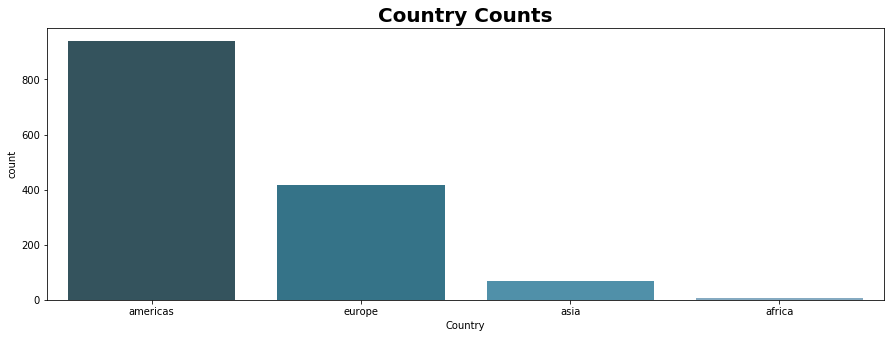

In [27]:
plt.figure(figsize=(15,5)) # Größe der Graphik festlegen
sns.countplot('Country',data = df, order = df['Country'].value_counts().index,palette="PuBuGn_d") # Welche Daten?
plt.title("Country Counts",fontsize=20,fontweight="bold") 
plt.show()

#### Gender Variable neu kategorisieren

In [28]:
# Wie viele unique Antworten haben wir?

df["Gender"] = df["Gender"].str.lower() # Transformiert die Antwortoptionen zu Lowercase
df.Gender.unique()

array(['male', 'male ', 'female', 'm', 'i identify as female.', 'female ',
       'bigender', 'non-binary', 'female assigned at birth ', 'f',
       'woman', 'man', 'fm', 'cis female ', 'transitioned, m2f',
       'genderfluid (born female)', 'other/transfeminine',
       'female or multi-gender femme', 'female/woman', 'cis male',
       'male.', 'androgynous', 'male 9:1 female, roughly', nan,
       'male (cis)', 'other', 'nb masculine', 'cisgender female',
       'sex is male', 'none of your business', 'genderqueer', 'human',
       'genderfluid', 'enby', 'malr', 'genderqueer woman', 'mtf', 'queer',
       'agender', 'dude', 'fluid',
       "i'm a man why didn't you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take? ",
       'mail', 'm|', 'male/genderqueer', 'fem', 'nonbinary',
       'female (props for making this a freeform field, though)',
       ' female', 'unicorn', 'male (trans, ftm)', 'cis-woman'

In [29]:
male = ['male', 'male ','m','man','cis male', 'male.','male 9:1 female, roughly','male (cis)','nb masculine', 'sex is male', 'malr',
       'dude', "i'm a man why didn't you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take? ",
       'mail', 'm|','cisdude', 'cis man', "malr"]
female = ['female', 'i identify as female.', 'female ','female assigned at birth ', 'f',
       'woman', 'fm', 'cis female ','female or multi-gender femme', 'female/woman','cisgender female', 'fem',
         'female (props for making this a freeform field, though)', ' female', 'cis-woman']
diverse = ['bigender', 'female-bodied; no feelings about gender','non-binary','transitioned, m2f', 'genderfluid (born female)', 'other/transfeminine', 'androgynous',
        'other','none of your business', 'genderflux demi-girl','genderqueer', 'human','genderfluid', 'enby', 'genderqueer woman',
        'mtf', 'queer','agender','fluid', 'male/genderqueer', 'nonbinary','unicorn', 'male (trans, ftm)','genderflux demi-girl'
        'female-bodied; no feelings about gender','afab', 'transgender woman']

In [30]:
df['Gender'] = df['Gender'].apply(lambda x:"male" if x in male else x)
df['Gender'] = df['Gender'].apply(lambda x:"female" if x in female else x)
df['Gender'] = df['Gender'].apply(lambda x:"diverse" if x in diverse else x)

# Wie viele unique Antwortoptionen haben wir jetzt?
df.Gender.unique()

array(['male', 'female', 'diverse', nan], dtype=object)

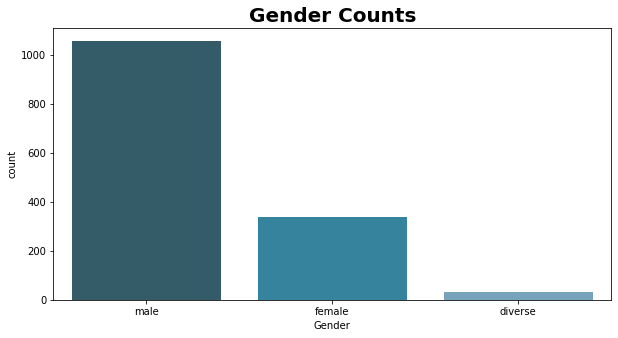

In [31]:
# Und das ganze mal visualisiert

plt.figure(figsize=(10,5)) # Größe der Graphik festlegen
sns.countplot('Gender',data = df, order = df['Gender'].value_counts().index,palette="PuBuGn_d") # Welche Daten?
plt.title("Gender Counts",fontsize=20,fontweight="bold") 
plt.show()

#### Age Variable bereinigen 

In [32]:
df = df.loc[(df["Age"] < 99) &(df["Age"] > 18)]

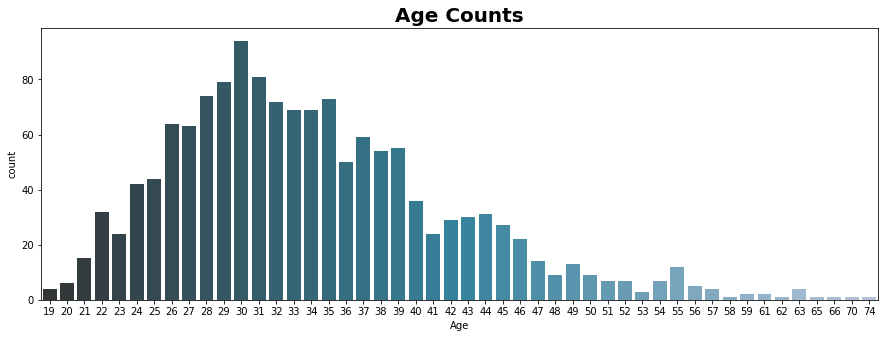

In [33]:
plt.figure(figsize=(15,5)) # Größe der Graphik festlegen
sns.countplot('Age',data = df, palette="PuBuGn_d") # Welche Daten?
plt.title("Age Counts",fontsize=20,fontweight="bold") 
plt.show()

### 4.3 Fehlende Werte entfernen oder ersetzen

**Was machen wir mit fehlenden Werten?**

Es gibt mehrere Optionen für den Umgang mit fehlenden Werten mit jeweils eigenen Vor- und Nachteilen.
Die Wahl, was zu tun ist, hängt jedoch weitgehend von der Art unserer Daten und den fehlenden Werten ab. 
Nachstehend finden Sie Optionen, die wir zur Behandlung fehlender Werte haben.

1. Fehlende Werte löschen 
2. Fehlende Werte mit einer Teststatistik (z.B. Median) auffüllen
3. Fehlende Werte mit einem Machine Learning Algorithmus vorhersagen
4. (bei kategoriellen Variablen) Fehlende Werte als eigene Kategorie betrachten

In [34]:
missing_df = helpers.missing_values_table(df)
missing_df

The dataset has 27 columns.
There are 15 columns that have missing values.


,Missing Values,% of Total Values
Reveal_Treatment,1141,80.0
Productivity,1141,80.0
Obs_Response2,773,54.2
Interview_phys2,336,23.6
Interview_psych2,306,21.5
Ment_Benefit,285,20.0
Ment_Discuss,285,20.0
Ment_Consequence,285,20.0
Phys_Consequence,285,20.0
Discuss_Coworkers,285,20.0


**Vorgehen:**
- Interview_phys und Interview_psych sind die Freitext-Variablen. Diese werden wir in der jetzigen Sitzung nicht weiter beachten (Exkurs:)
- Columns mit mehr als 50% fehlenden Werten, bzw, fehlende Werte bei Gender werden wir löschen
- Die Variable Obs_Response_1 werden wir mit einer Teststatistik ersetzen 
- bei den übrigen Variablen werden wir na als eigene Kategorie annehmen. 

#### 4.3.1 Fehlende Werte löschen

In [35]:
# Welche columns haben mehr als 50% fehlende Werte? Diese werden wir löschen

missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('\n','The following %d columns will be deleted:' % len(missing_columns), missing_columns)


 The following 3 columns will be deleted: ['Reveal_Treatment', 'Productivity', 'Obs_Response2']


In [36]:
# Entferne die columns mit > 50% missing values

df = df.drop(columns = missing_columns)

In [37]:
# Entferne die rows in der Gender column mit fehlenden Werten (nur 0.3%)

df = df[df['Gender'].notna()]

#### 4.3.2 Fehlende Werte durch Teststatistik ersetzen

In [38]:
# wir werden die Variabkle Obs_Response1 durch den Modus, d.h. häufigsten Wert ersetzen

mode_value = df["Obs_Response1"].mode()[0]

df["Obs_Response1"] = df["Obs_Response1"].fillna(mode_value)

In [39]:
missing_df = helpers.missing_values_table(df)
missing_df

The dataset has 24 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
Interview_phys2,335,23.5
Interview_psych2,305,21.4
Ment_Benefit,285,20.0
Ment_Discuss,285,20.0
Ment_Consequence,285,20.0
Phys_Consequence,285,20.0
Discuss_Coworkers,285,20.0
Discuss_Supervisor,285,20.0
Ment_vs_Phys,285,20.0
Obs_Consequence,285,20.0


#### 4.3.3 Fehlende Werte zu einer eigenen Kategorie machen

In [40]:
new_category = "Missing"

In [41]:
missing_list = ["Ment_Benefit", "Ment_Discuss", "Ment_Consequence", "Phys_Consequence", "Discuss_Coworkers",
               "Discuss_Supervisor", "Ment_vs_Phys", "Obs_Consequence"]

In [42]:
for column in missing_list:
    df[column] = df[column].fillna(new_category)

In [43]:
df.Ment_Benefit.unique()

array(['Not eligible for coverage / N/A', 'No', 'Missing', 'Yes',
       "I don't know"], dtype=object)

In [44]:
missing_df = helpers.missing_values_table(df)
missing_df

The dataset has 24 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Interview_phys2,335,23.5
Interview_psych2,305,21.4


In [45]:
# Welche Variablen nehmen wir für unser Modell auf?
column_list = ["Employment", "Interview_phys1","Interview_psych1", "Career_Consequence", "Coworkers_view", 
               "Share_friends","Obs_Response1", "Age", "Gender", "Country", "Ment_Benefit",
              "Ment_Discuss", "Ment_Consequence", "Phys_Consequence", "Discuss_Coworkers", "Discuss_Supervisor", 
               "Ment_vs_Phys", "Obs_Consequence", "Interferes1", "Interferes2"]


In [46]:
for entry in df.columns:
    if entry not in column_list:
        print(entry)

Interview_phys2
Interview_psych2
Disorder
Treatment


### 4.4 Feature Scaling & Encoding

#### 4.4.1 Age Variable skalieren

Die Skalierung passt den Bereich der Daten oder den Mittelwert und die Standardabweichung an einen definierten Bereich an. Meistens geschieht dies, weil ein Modell einen bestimmten Maßstab erwartet.
Der MinMaxScaler skaliert Daten auf Werte im Bereich zwischen 0 und 1.

In [47]:
train_df = df[column_list]

In [48]:
scaler = MinMaxScaler() 

train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df['Age'].describe()

count    1423.000000
mean     0.274669   
std      0.147076   
min      0.000000   
25%      0.163636   
50%      0.254545   
75%      0.363636   
max      1.000000   
Name: Age, dtype: float64

#### 4.4.2 Kategoriale Variablen faktorisieren/ One-Hot-encoden

Für die meisten Algorithmen, v.a. mit dem scikit-learn Package, müssen kategoriale Variablen (v.a. Wörter) in Zahlen umgewandelt werden. Dafür können wir z.B. die Funktion pd.factorize() verwenden. Seien Sie aber vorsichtig, wenn Sie pd.factorize() verwenden, um eine numerische Spalte zu erzeugen, die als Eingabe in ein Modell verwendet wird. Während die Zahl, die den Kategorien zugewiesen wird, willkürlich ist, interpretiert Scikit-Learn (oder jedes andere Modellierungspaket) die Zahlen entsprechend ihrer Größenordnung; so ist z.B. eine 4 immer noch größer als 2 und trägt somit entsprechend zu den Koeffizienten des Trainingsmodells bei. Dadurch können die resultierenden Zahlen das Modell verzerren.

Wenn die Skalen nicht ordinal sind (d.h. die Reihenfolge kann nicht interpretiert werden) müssen wir die kategorialen One-Hot Encoden. Das machen wir mit der pd.get_dummies()-Funktion. Die get_dummies()-Methode erstellt jedoch für jede  Kategorie eine neue Spalte, in die resultierenden Werte binär sind. 

In [49]:
answer_table = helpers.show_answers(train_df)
answer_table

,Amount of Answers,Anwers
Item,,
Age,48,Free Input
Share_friends,6,"[Somewhat open, Neutral, Not applicable to me (I do not have a mental illness), Very open, Not open at all, Somewhat not open]"
Ment_Benefit,5,"[Not eligible for coverage / N/A, No, Missing, Yes, I don't know]"
Interferes1,5,"[Not applicable to me, Rarely, Sometimes, Never, Often]"
Interferes2,5,"[Not applicable to me, Sometimes, Often, Rarely, Never]"
Coworkers_view,5,"[No, I don't think they would, Maybe, Yes, they do, Yes, I think they would, No, they do not]"
Career_Consequence,5,"[Maybe, No, I don't think it would, Yes, I think it would, No, it has not, Yes, it has]"
Obs_Response1,4,"[No, Maybe/Not sure, Yes, I experienced, Yes, I observed]"
Country,4,"[europe, americas, asia, africa]"


In [50]:
factor_list = ["Interview_psych1", "Interview_phys1"]

In [51]:
encoders_list = ["Share_friends", "Interferes2", "Ment_Benefit", "Coworkers_view", "Career_Consequence", "Interferes1",
                "Obs_Response1", "Ment_Discuss", "Ment_Consequence", "Phys_Consequence", "Discuss_Coworkers",
                "Discuss_Supervisor", "Ment_vs_Phys", "Gender", "Obs_Consequence", "Country"]

In [52]:
# Ordinale Variablen werden faktorisiert 

for feature in factor_list:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])

In [53]:
train_df = pd.get_dummies(train_df, columns=encoders_list)

In [54]:
train_df

,Employment,Interview_phys1,Interview_psych1,Age,Share_friends_Neutral,Share_friends_Not applicable to me (I do not have a mental illness),Share_friends_Not open at all,Share_friends_Somewhat not open,Share_friends_Somewhat open,Share_friends_Very open,Interferes2_Never,Interferes2_Not applicable to me,Interferes2_Often,Interferes2_Rarely,Interferes2_Sometimes,Ment_Benefit_I don't know,Ment_Benefit_Missing,Ment_Benefit_No,Ment_Benefit_Not eligible for coverage / N/A,Ment_Benefit_Yes,Coworkers_view_Maybe,"Coworkers_view_No, I don't think they would","Coworkers_view_No, they do not","Coworkers_view_Yes, I think they would","Coworkers_view_Yes, they do",Career_Consequence_Maybe,"Career_Consequence_No, I don't think it would","Career_Consequence_No, it has not","Career_Consequence_Yes, I think it would","Career_Consequence_Yes, it has",Interferes1_Never,Interferes1_Not applicable to me,Interferes1_Often,Interferes1_Rarely,Interferes1_Sometimes,Obs_Response1_Maybe/Not sure,Obs_Response1_No,"Obs_Response1_Yes, I experienced","Obs_Response1_Yes, I observed",Ment_Discuss_I don't know,Ment_Discuss_Missing,Ment_Discuss_No,Ment_Discuss_Yes,Ment_Consequence_Maybe,Ment_Consequence_Missing,Ment_Consequence_No,Ment_Consequence_Yes,Phys_Consequence_Maybe,Phys_Consequence_Missing,Phys_Consequence_No,Phys_Consequence_Yes,Discuss_Coworkers_Maybe,Discuss_Coworkers_Missing,Discuss_Coworkers_No,Discuss_Coworkers_Yes,Discuss_Supervisor_Maybe,Discuss_Supervisor_Missing,Discuss_Supervisor_No,Discuss_Supervisor_Yes,Ment_vs_Phys_I don't know,Ment_vs_Phys_Missing,Ment_vs_Phys_No,Ment_vs_Phys_Yes,Gender_diverse,Gender_female,Gender_male,Obs_Consequence_Missing,Obs_Consequence_No,Obs_Consequence_Yes,Country_africa,Country_americas,Country_asia,Country_europe
0,0,0,0,0.363636,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1
1,0,0,1,0.181818,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0
2,0,2,2,0.345455,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1
3,1,2,0,0.436364,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1
4,0,0,1,0.436364,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,1,1,0.272727,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
1429,1,0,1,0.672727,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0
1430,0,0,1,0.600000,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0
1431,0,0,1,0.200000,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


### Train und Test Datensatz festlegen

In [55]:
X = train_df # das sind unsere Prädiktoren
y = df["Treatment"] # das ist die Variable, die vorhergesagt wird

In [56]:
# mit der Pickle Funktion packen wir den fertig bearbeiteten Dataframe in eine Datei, die wir nächste Woche einfach 
# importieren können. 
X.to_pickle("./X_df.pkl")
y.to_pickle("./y_df.pkl")